In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import numpy as np
import pandas as pd

In [4]:
# just do gb1
ss_df = pd.read_csv('results/simulations/DE-active/scale2max/GB1-single_step_DE.csv')
recomb_df = pd.read_csv("results/simulations/DE-active/scale2max/GB1-recomb_SSM.csv")

In [5]:
mlde_all = pd.read_csv("results/mlde/vis_2/all_df.csv")
mlde_df = mlde_all[(mlde_all["lib"] == "GB1") & (mlde_all["n_mut_cutoff"] == "all") & (mlde_all["zs"]== "none") & (mlde_all["encoding"] == "one-hot")].copy()

In [6]:
from SSMuLA.util import ecdf_transform

In [7]:
mlde_df["final_fitness"] = mlde_df["top_maxes"].values.copy()
mlde_df["final_fitness ECDF"] = ecdf_transform(mlde_df["top_maxes"])

In [11]:
mlde_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,final_fitness,final_fitness ECDF
1058600,one-hot,boosting,384,149361,0,0.337172,0.006653,0.627128,0.122141,0.770298,0.416548,0.0,10197.0,all,GB1,none,384,0.627128,0.341429
1058601,one-hot,boosting,384,149361,1,0.313149,0.005628,0.831130,0.100569,0.785195,0.448754,0.0,23235.0,all,GB1,none,384,0.831130,0.739286
1058602,one-hot,boosting,384,149361,2,0.367535,0.005830,0.629503,0.129742,0.785543,0.451986,0.0,36245.0,all,GB1,none,384,0.629503,0.365000
1058603,one-hot,boosting,384,149361,3,0.497862,0.008681,0.716157,0.055017,0.765613,0.468036,0.0,30436.0,all,GB1,none,384,0.716157,0.548571
1058604,one-hot,boosting,384,149361,4,0.465515,0.007334,0.689827,0.065948,0.768410,0.482155,0.0,36890.0,all,GB1,none,384,0.689827,0.505714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059995,one-hot,ridge,576,149361,45,0.136799,0.009462,0.784978,0.380986,0.847032,0.445571,0.0,4426.0,all,GB1,none,96,0.784978,0.694286
1059996,one-hot,ridge,576,149361,46,0.175067,0.012426,0.784978,0.243581,0.833909,0.429427,0.0,843.0,all,GB1,none,96,0.784978,0.695000
1059997,one-hot,ridge,576,149361,47,0.136367,0.007313,0.784978,0.279715,0.816702,0.423117,0.0,11145.0,all,GB1,none,96,0.784978,0.695714
1059998,one-hot,ridge,576,149361,48,0.135847,0.008026,0.473378,0.179254,0.809781,0.505576,0.0,23890.0,all,GB1,none,96,0.473378,0.066429


In [13]:
mlde_df["n_sample"].unique()

array([384,  96, 192, 288, 480, 576])

In [15]:
mlde_df_96 = mlde_df[mlde_df["n_sample"] == 96]["top_maxes"]
mlde_df_192 = mlde_df[mlde_df["n_sample"] == 192]["top_maxes"]
mlde_df_288 = mlde_df[mlde_df["n_sample"] == 288]["top_maxes"]
mlde_df_384 = mlde_df[mlde_df["n_sample"] == 384]["top_maxes"]

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
ten_colors = list(LIB_COLORS.values())
ten_colors

['#f79646ff',
 '#f9be00',
 '#89bf91',
 '#6db290',
 '#57a490',
 '#44948f',
 '#33858d',
 '#24768b',
 '#1c6689',
 '#215584',
 '#28437b',
 '#666666']

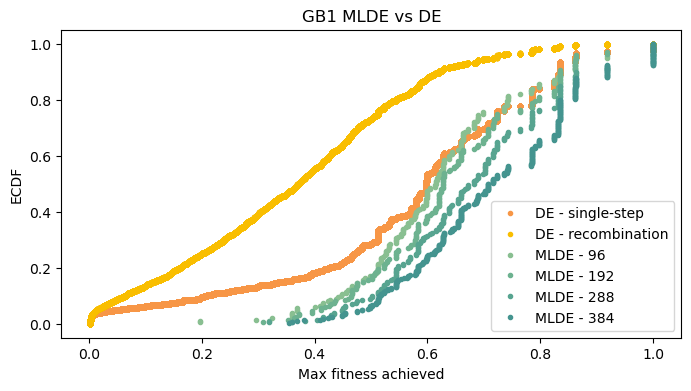

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(ss_df["final_fitness"], ss_df["final_fitness ECDF"], ".", label = "DE - single-step", color = ten_colors[0])
plt.plot(recomb_df["final_fitness"], recomb_df["final_fitness ECDF"], ".", label = "DE - recombination", color = ten_colors[1])
plt.plot(mlde_df_96, ecdf_transform(mlde_df_96), ".", label = "MLDE - 96", color = ten_colors[2])
plt.plot(mlde_df_192, ecdf_transform(mlde_df_192), ".", label = "MLDE - 192", color = ten_colors[3])
plt.plot(mlde_df_288, ecdf_transform(mlde_df_288), ".", label = "MLDE - 288", color = ten_colors[4])
plt.plot(mlde_df_384, ecdf_transform(mlde_df_384), ".", label = "MLDE - 384", color = ten_colors[5])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE")
plt.show()

In [19]:
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

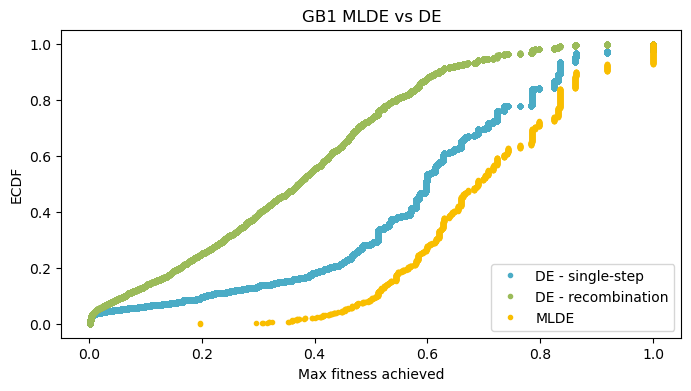

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(ss_df["final_fitness"], ss_df["final_fitness ECDF"], ".", label = "DE - single-step", color = PRESENTATION_PALETTE_SATURATE["blue"])
plt.plot(recomb_df["final_fitness"], recomb_df["final_fitness ECDF"], ".", label = "DE - recombination", color = PRESENTATION_PALETTE_SATURATE["green"])
plt.plot(mlde_df["final_fitness"], mlde_df["final_fitness ECDF"], ".", label = "MLDE", color=PRESENTATION_PALETTE_SATURATE["yellow"])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE")
plt.show()

In [12]:
from SSMuLA.landscape_global import hamming

In [13]:
from SSMuLA.landscape_global import LIB_INFO_DICT

ss_df['n_mut'] = ss_df["start_seq"].apply(hamming, str2="".join(LIB_INFO_DICT["GB1"]["AAs"].values()))
recomb_df['n_mut'] = recomb_df["start_seq"].apply(hamming, str2="".join(LIB_INFO_DICT["GB1"]["AAs"].values()))


In [14]:
ss_df["n_mut"].unique()

array([0, 1, 2, 3, 4])

In [15]:
ss_df2 = ss_df[ss_df["n_mut"] <=2].copy()
recomb_df2 = recomb_df[recomb_df["n_mut"] <=2].copy()

In [16]:
mlde_df2 = mlde_all[(mlde_all["lib"] == "GB1") & (mlde_all["n_mut_cutoff"] == "double") & (mlde_all["zs"]== "none") & (mlde_all["encoding"] == "one-hot")].copy()

In [17]:
mlde_df2.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top'],
      dtype='object')

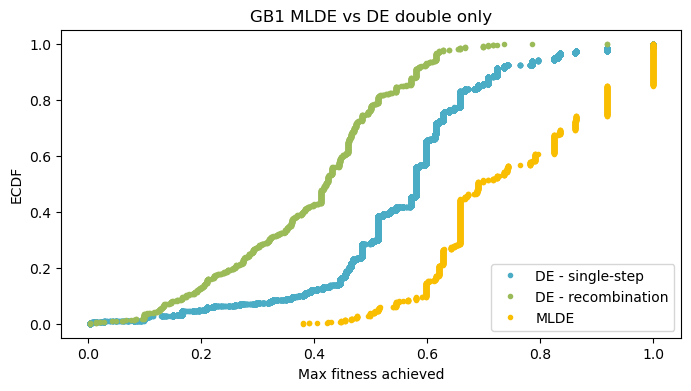

In [18]:
plt.figure(figsize=(8,4))
plt.plot(ss_df2["final_fitness"], ecdf_transform(ss_df2["final_fitness"]), ".", label = "DE - single-step", color = PRESENTATION_PALETTE_SATURATE["blue"])
plt.plot(recomb_df2["final_fitness"], ecdf_transform(recomb_df2["final_fitness"]), ".", label = "DE - recombination", color = PRESENTATION_PALETTE_SATURATE["green"])
plt.plot(mlde_df2["top_maxes"], ecdf_transform(mlde_df2["top_maxes"]), ".", label = "MLDE", color = PRESENTATION_PALETTE_SATURATE["yellow"])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE double only")
plt.show()

In [29]:
from SSMuLA.vis import save_plt
from SSMuLA.landscape_global import LIB_INFO_DICT, hamming, n_mut_cutoff_dict
from SSMuLA.util import checkNgen_folder

In [31]:
plot_folder = checkNgen_folder("results/de_vs_mlde/onehot/n_samples")

mlde_all = pd.read_csv("results/mlde/vis_2/all_df.csv").copy()

for lib in LIB_INFO_DICT.keys():
    ss_df_all = pd.read_csv(
        f"results/simulations/DE-active/scale2max/{lib}-single_step_DE.csv"
    )
    recomb_df_all = pd.read_csv(
        f"results/simulations/DE-active/scale2max/{lib}-recomb_SSM.csv"
    )

    # append numb mut
    # ss_df_all["n_mut"] = ss_df_all["start_seq"].apply(
    #     hamming, str2="".join(LIB_INFO_DICT[lib]["AAs"].values())
    # )
    # recomb_df_all["n_mut"] = recomb_df_all["start_seq"].apply(
    #     hamming, str2="".join(LIB_INFO_DICT[lib]["AAs"].values())
    # )
    ss_df = ss_df_all.copy()
    recomb_df = recomb_df_all.copy()

    for n_mut_cutoff in [
        0,
        1,
        2,
    ]:
        plot_title = f"{lib} MLDE vs DE {n_mut_cutoff_dict[n_mut_cutoff]}"

        if n_mut_cutoff == 0:
            mlde_df = mlde_all[
                (mlde_all["lib"] == lib)
                & (mlde_all["n_mut_cutoff"] == "all")
                & (mlde_all["zs"] == "none")
                & (mlde_all["encoding"] == "one-hot")
            ].copy()

            # ss_df = ss_df_all.copy()
            # recomb_df = recomb_df_all.copy()

        else:
            mlde_df = mlde_all[
                (mlde_all["lib"] == lib)
                & (mlde_all["n_mut_cutoff"] == n_mut_cutoff_dict[n_mut_cutoff])
                & (mlde_all["zs"] == "none")
                & (mlde_all["encoding"] == "one-hot")
            ].copy()

            # ss_df = ss_df_all[ss_df_all["n_mut"] <= n_mut_cutoff].copy()
            # recomb_df = recomb_df_all[recomb_df_all["n_mut"] <= n_mut_cutoff].copy()

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(
            ss_df["final_fitness"],
            ecdf_transform(ss_df["final_fitness"]),
            ".",
            label="DE - single-step",
            color=ten_colors[0],
        )
        ax.plot(
            recomb_df["final_fitness"],
            ecdf_transform(recomb_df["final_fitness"]),
            ".",
            label="DE - recombination",
            color=ten_colors[1],
        )

        for n, n_samples in enumerate([96, 192, 288, 384]):
            mlde_df_n = mlde_df[mlde_df["n_sample"] == n_samples]["top_maxes"]
            ax.plot(
                mlde_df_n,
                ecdf_transform(mlde_df_n),
                ".",
                label=f"MLDE - {str(n_samples)}",
                color=ten_colors[n + 2],
            )

        # ax.plot(
        #     mlde_df["top_maxes"],
        #     ecdf_transform(mlde_df["top_maxes"]),
        #     ".",
        #     label="MLDE",
        #     color=PRESENTATION_PALETTE_SATURATE["yellow"],
        # )
        plt.xlabel("Max fitness achieved")
        plt.ylabel("ECDF")
        plt.legend(loc="upper left")
        plt.title(plot_title)

        save_plt(
            fig,
            plot_title=plot_title,
            path2folder=plot_folder,
        )